In [3]:
# Import the Tensorflow packages
import tensorflow as tf
from sklearn.datasets import load_diabetes
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 2.6 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 1.6 MB/s eta 0:00:0000:0100:01m


In [4]:
# This is a dummy data set 
# This is a regression model
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target.reshape(-1,1)
dia_df = pd.DataFrame(x, columns = diabetes.feature_names)
dia_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
# Retrieves informations about the data
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
dia_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


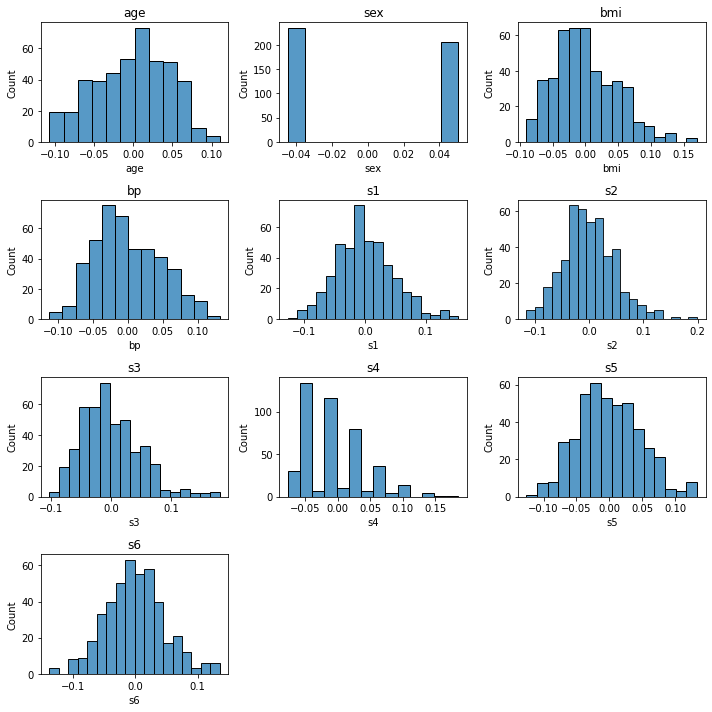

In [9]:
# check data distribution
# this uses an earlier pyhton version to work on m1 macos therefor no type hints are added
import matplotlib.pyplot as plt
import seaborn as sns

def check_distribution(data):
    """Checks the distribution of the data by drawing a histogram

    Args:
        data (pd.Dataframe): data holder
    """
    count = 0
    fig = plt.figure(figsize=(10,10))
    for column in data.columns:
        ax = plt.subplot(4,3, count + 1)
        sns.histplot(data[column], ax = ax)
        count += 1
        plt.tight_layout()
        plt.title(column)
    
check_distribution(dia_df)
        

In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

# this should again split the model
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [11]:
def r_squared(y_true, y_pred):
    """Implementation of a function that is not availabe

    Args:
        y_true (_type_): _description_
        y_pred (_type_): _description_
        
    returns:
        r2_clipped()
    """
    error = tf.math.subtract(y_true, y_pred)
    sq_err = tf.math.square(error)
    numerator = tf.math.reduce_sum(sq_err)
    y_true_mean = tf.math.reduce_mean(y_true)
    mean_deviation = tf.math.subtract(y_true, y_true_mean)
    squared_mean_deviation = tf.math.square(mean_deviation)
    denominator = tf.reduce_sum(squared_mean_deviation)
    r2 = tf.math.subtract(1.0, tf.math.divide(numerator,denominator))
    r2_clipped = tf.clip_by_value(r2, clip_value_min = 0, clip_value_max= 1)
    return r2_clipped 

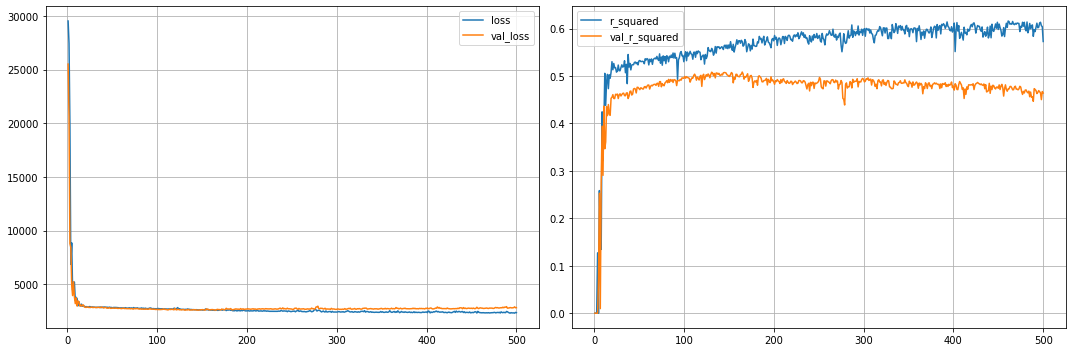

3/3 [==============================] - 0s 50ms/step - loss: 2839.0955 - r_squared: 0.3806
Scores: [2839.095458984375, 0.38058537244796753]


In [22]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam


def build_model(num_features, num_targets):
    """Create the Tensorflow NN

    Args:
        num_features (int): number of features train_data
        num_targets (int): number of features train_classes

    Returns:
        _type_: _description_
    """
    
    model = Sequential()
    model.add(Dense(units=24, input_shape = (num_features,)))
    model.add(Activation("relu"))
    model.add(Dense(units=12))
    model.add(Activation("relu"))
    model.add(Dense(units=12))
    model.add(Activation("relu"))
    model.add(Dense(units=num_targets))
    model.summary()
    return model


opt = Adam(learning_rate = 0.07)
num_features = X_train.shape[1]
num_targets = y_train.shape[1]
model = build_model(num_features, num_targets)

model.compile(loss = "mse", 
              optimizer = opt, 
              metrics = [r_squared])
callback_list = [PlotLearning()]
model.fit(x = X_train, 
          y = y_train, 
          epochs = 500, 
          batch_size = 128, 
          verbose = 1, 
          validation_data = (X_test, y_test),
          callbacks = callback_list)

scores = model.evaluate(x = X_test, y = y_test)
print(f"Scores: {scores}")

In [20]:
from IPython.display import clear_output
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()